Curve di possibilità pluviometrica

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np


In [2]:
os.getcwd()
os.chdir('C:\\Users\\super\\Documents\\UNITN\\Idrologia\\EserciziAula\\FEDAIA')

In [3]:
data=pd.read_csv('DatiFedaia.csv')

In [4]:
map(datetime,data['Anno'])
data=data.set_index('Anno')

In [5]:
data

,1h,3h,6h,12h,24h
Anno,,,,,
1919,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN
1921,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2006,NaN,NaN,NaN,NaN,NaN
2007,12.6,32.2,43.8,48.6,57.0
2008,40.0,50.8,61.2,83.4,91.8


In [6]:
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

In [7]:
def qtls(df,qu):                                        # definisco qtls (quantili)...calcolo i valori di h per un certo set di parametri ed una certa serie di quantili
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])            #inverte una curva di Gumbel e ritorna il valore h (durata)
    return rv1h.ppf(qu)

In [8]:
def h_g(bs,col,tr):                                                    #funzione che mi ritorna...
    return bs[col]["a"]+bs[col]["b"]*(-math.log(-math.log(1-1/tr)))

In [9]:
best=pd.read_pickle("best_param")
best

,1h,3h,6h,12h,24h
a,12.601354,22.712616,31.960715,48.746973,66.168039
b,3.002031,5.155363,9.341875,13.646262,24.067697


In [10]:
[qtls(best["1h"],0.9),qtls(best["3h"],0.9),qtls(best["6h"],0.9),qtls(best["12h"],0.9),
 qtls(best["24h"],0.9)]

[19.357026010942114,
 34.31407583755116,
 52.98336439874013,
 79.45607567903446,
 120.3291981568932]

In [11]:
q10=1-1/10
q20=1-1/20
q100=1-1/100

def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

pts=DataFrame([[qtls(best["1h"],q10),
           qtls(best["3h"],q10),
           qtls(best["6h"],q10),
           qtls(best["12h"],q10),
           qtls(best["24h"],q10)],
          [qtls(best["1h"],q20),
           qtls(best["3h"],q20),
           qtls(best["6h"],q20),
           qtls(best["12h"],q20),
           qtls(best["24h"],q20)],
          [qtls(best["1h"],q100),
           qtls(best["3h"],q100),
           qtls(best["6h"],q100),
           qtls(best["12h"],q100),
           qtls(best["24h"],q100)]], index=[10,20,100],columns=[1,3,6,12,24]).T
pts

,10,20,100
1,19.357026,21.517972,26.411144
3,34.314076,38.025050,46.428054
6,52.983364,59.707907,74.934732
12,79.456076,89.279036,111.521815
24,120.329198,137.653798,176.883037


(0.0, 200.0)

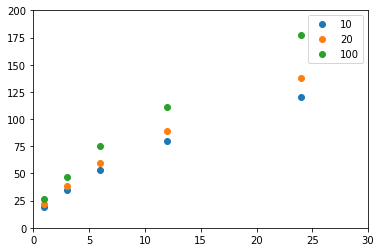

In [12]:
ag=pts.plot(style="o")
plt.xlim([0,30])
plt.ylim([0,200])

(0.0, 200.0)

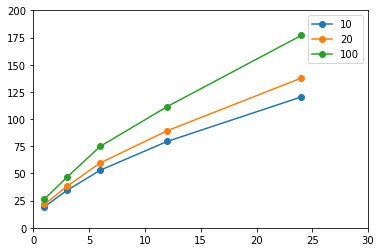

In [13]:
ag=pts.plot(style="-o")
plt.xlim([0,30])
plt.ylim([0,200])

C:\Users\super\anaconda3\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


(17.329907953981284, 200)

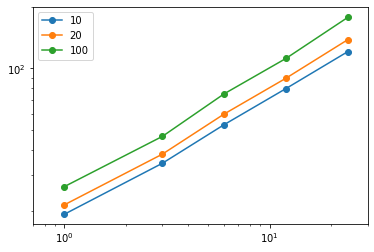

In [14]:
ag=pts.plot(style="-o")
ag.set_yscale('log')                                          #scala bilogaritmica, le curva sono rette
ag.set_xscale('log')
plt.xlim([0.7,30])
plt.ylim([0,200])

In [15]:
pts[10]

1      19.357026
3      34.314076
6      52.983364
12     79.456076
24    120.329198
Name: 10, dtype: float64

In [16]:
np.log(pts[10])     

1     2.963055
3     3.535556
6     3.969978
12    4.375204
24    4.790231
Name: 10, dtype: float64

In [17]:
np.log(pts[10].index)

Float64Index([               0.0, 1.0986122886681098,  1.791759469228055,
              2.4849066497880004, 3.1780538303479458],
             dtype='float64')

In [18]:
in10=np.polyfit(np.log(pts[10].index),np.log(pts[10]),1)
in10  

array([0.5784871 , 2.93720647])

In [19]:
in10[1]=np.exp(in10[1])
in10  

array([ 0.5784871 , 18.86307806])

In [20]:
in20=np.polyfit(np.log(pts[20].index),np.log(pts[20]),1)                    #tr=20 anni
in20[1]=np.exp(in20[1])
in20

array([ 0.58730182, 20.86230225])

In [21]:
in100=np.polyfit(np.log(pts[100].index),np.log(pts[100]),1)
in100

array([0.60147328, 3.23468312])

In [22]:
in100[1]=np.exp(in100[1])
in100

array([ 0.60147328, 25.39832228])

In [23]:
fnl=DataFrame([in10,in20,in100],index=[10,20,100],columns=["n","a"])
fnl

,n,a
10,0.578487,18.863078
20,0.587302,20.862302
100,0.601473,25.398322


In [24]:
tp=np.linspace(0.7,30,100)             #definisco spazio lineare
tp[-5:]

array([28.81616162, 29.11212121, 29.40808081, 29.7040404 , 30.        ])

In [25]:
def h(tp,a,n):                 #definisco le curve di possibiltà pluviometrica
    return a*tp**n

In [26]:
h10=h(tp,fnl["a"][10],fnl["n"][10])
h20=h(tp,fnl["a"][20],fnl["n"][20])
h100=h(tp,fnl["a"][100],fnl["n"][100])

In [27]:
inh=DataFrame([h10,h20,h100],index=["Tr = 10","Tr = 20","Tr = 100"],
              columns=tp).T
inh[:2]

,Tr = 10,Tr = 20,Tr = 100
0.700000,15.346303,16.919520,20.494420
0.995960,18.818951,20.812756,25.336550
1.291919,21.875640,24.248839,29.628531
1.587879,24.648064,27.371754,33.542181
1.883838,27.209575,30.261877,37.173755


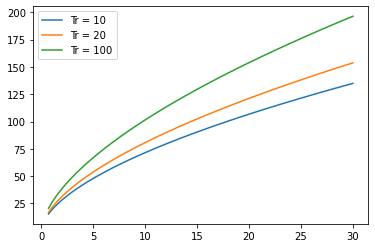

In [28]:
ag=inh.plot()    

(0.0, 200.0)

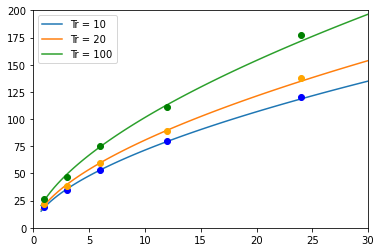

In [29]:
ag=inh.plot()  
ag=plot(pts[10],"o",color="blue")
ag=plot(pts[20],"o",color="orange")
ag=plot(pts[100],"o",color="green")

plt.xlim([0,30])
plt.ylim([0,200])

C:\Users\super\anaconda3\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':
C:\Users\super\anaconda3\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


(13.509561877661195, 200)

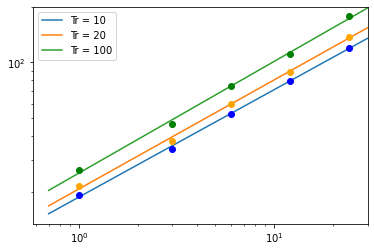

In [30]:
ag=inh.plot()
ag.set_yscale('log')                                                 #scale logaritmiche...ottengo delle retet che dovrebbero essere + o - parallele tra di loro
ag.set_xscale('log')

ag=plot(pts[10],"o",color="blue")
ag=plot(pts[20],"o",color="orange")
ag=plot(pts[100],"o",color="green")

plt.xlim([0.,30])
plt.ylim([0,200])